# Re-gridding xecmip

The aim of this notebook is to re-grid all of the zecmip data to a common grid.


In [1]:
import xarray as xr
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
from typing import NamedTuple
sys.path.append('..')
sys.path.append('../modules')
from typing import NamedTuple

import constants
import xarray_class_accessors as xca
import sn_plotting

import open_ds
import json

In [2]:
constants.IMAGE_SAVE_DIR_INIT

'/home/563/ab2313/gdata/images/PhD/init'

In [13]:
# File that contains all the saved paths for zecmip runs
with open('zecmip_model_paths.json', 'r') as f:
    zecmip_model_paths = json.loads(f.read())

In [18]:
type(zecmip_model_paths)

dict

In [22]:
pprint(zecmip_model_paths)

{'1000pgc': {'all': ['/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/esm-1pct-brch-1000PgC/r1i1p2f1/Amon/pr/gn/v20190429',
                     '/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/esm-1pct-brch-1000PgC/r1i1p2f1/Amon/tas/gn/v20190429',
                     '/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/esm-1pct-brch-1000PgC/r2i1p2f1/Amon/pr/gn/v20190429',
                     '/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/esm-1pct-brch-1000PgC/r2i1p2f1/Amon/tas/gn/v20190429',
                     '/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/esm-1pct-brch-1000PgC/r3i1p2f1/Amon/pr/gn/v20190429',
                     '/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/esm-1pct-brch-1000PgC/r3i1p2f1/Amon/tas/gn/v20190429',
                     '/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/esm-1pct-brch-1000PgC/r4i1p2f1/Amon/pr/gn/v20190429',
                     '/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/esm-1pct-brch-1000PgC/r4i1p2f1/Amon/tas/gn/v20190429',
    

In [23]:
zecmip_model_paths.keys()

dict_keys(['1000pgc', 'picontrol'])

In [24]:
zecmip_model_paths['1000pgc'].keys()

dict_keys(['all', 'needed'])

In [6]:
needed_experiments = list(zecmip_model_paths['1000pgc']['needed'].values())
needed_experiments

['/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/esm-1pct-brch-1000PgC/r1i1p2f1/Amon/tas/gn/v20190429',
 '/g/data/oi10/replicas/CMIP6/C4MIP/MIROC/MIROC-ES2L/esm-1pct-brch-1000PgC/r1i1p1f2/Amon/tas/gn/v20200622',
 '/g/data/oi10/replicas/CMIP6/C4MIP/MOHC/UKESM1-0-LL/esm-1pct-brch-1000PgC/r1i1p1f2/Amon/tas/gn/v20200210',
 '/g/data/oi10/replicas/CMIP6/C4MIP/MPI-M/MPI-ESM1-2-LR/esm-1pct-brch-1000PgC/r1i1p1f1/Amon/tas/gn/v20190815',
 '/g/data/oi10/replicas/CMIP6/C4MIP/NASA-GISS/GISS-E2-1-G-CC/esm-1pct-brch-1000PgC/r1i1p1f1/Amon/tas/gn/v20191202',
 '/g/data/oi10/replicas/CMIP6/C4MIP/NCAR/CESM2/esm-1pct-brch-1000PgC/r1i1p1f1/Amon/tas/gn/v20191119',
 '/g/data/oi10/replicas/CMIP6/C4MIP/NCC/NorESM2-LM/esm-1pct-brch-1000PgC/r1i1p1f1/Amon/tas/gn/v20191108',
 '/g/data/oi10/replicas/CMIP6/C4MIP/NOAA-GFDL/GFDL-ESM4/esm-1pct-brch-1000PgC/r1i1p1f1/Amon/tas/gr1/v20180701']

# Opening Sample Data

In [7]:
fpath = needed_experiments[0]

In [8]:
reload(open_ds)

<module 'open_ds' from '/home/563/ab2313/Documents/PhD/zec_mip/../modules/open_ds.py'>

In [9]:
picontrol_ds = open_ds.zecmip_open_matching_picontrol(fpath, zecmip_model_paths['picontrol'])[['tas']]
picontrol_ds = open_ds.correct_dataset(picontrol_ds)
picontrol_ds

Opening all datasets in location /g/data/oi10/replicas/CMIP6/CMIP/UA/MCM-UA-1-0/piControl/r1i1p1f1/Amon/tas/gn/v20190731


\Data correction successfull


<xarray.Dataset>
Dimensions:  (time: 500, lat: 80, lon: 96)
Coordinates:
  * time     (time) object 0001-12-31 00:00:00 ... 0500-12-31 00:00:00
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * lat      (lat) float64 -88.29 -86.07 -83.84 -81.61 ... 83.84 86.07 88.29
Data variables:
    tas      (time, lat, lon) float32 dask.array<chunksize=(1, 80, 96), meta=np.ndarray>

In [10]:
experiment_ds = xr.open_mfdataset(os.path.join(fpath, '*.nc'))
experiment_ds = open_ds.correct_dataset(experiment_ds)[['tas']]
experiment_ds



\Data correction successfull


<xarray.Dataset>
Dimensions:  (time: 100, lat: 64, lon: 128)
Coordinates:
  * time     (time) object 0001-12-31 00:00:00 ... 0100-12-31 00:00:00
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    height   float64 ...
Data variables:
    tas      (time, lat, lon) float32 dask.array<chunksize=(1, 64, 128), meta=np.ndarray>

In [11]:
lat_length = len(picontrol_ds.lat.values)
lat_length

80

# Common Grid Size

In [27]:
reload(open_ds)

<module 'open_ds' from '/home/563/ab2313/Documents/PhD/zec_mip/../modules/open_ds.py'>

In [32]:
needed_experiments

['/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/esm-1pct-brch-1000PgC/r1i1p2f1/Amon/tas/gn/v20190429',
 '/g/data/oi10/replicas/CMIP6/C4MIP/MIROC/MIROC-ES2L/esm-1pct-brch-1000PgC/r1i1p1f2/Amon/tas/gn/v20200622',
 '/g/data/oi10/replicas/CMIP6/C4MIP/MOHC/UKESM1-0-LL/esm-1pct-brch-1000PgC/r1i1p1f2/Amon/tas/gn/v20200210',
 '/g/data/oi10/replicas/CMIP6/C4MIP/MPI-M/MPI-ESM1-2-LR/esm-1pct-brch-1000PgC/r1i1p1f1/Amon/tas/gn/v20190815',
 '/g/data/oi10/replicas/CMIP6/C4MIP/NASA-GISS/GISS-E2-1-G-CC/esm-1pct-brch-1000PgC/r1i1p1f1/Amon/tas/gn/v20191202',
 '/g/data/oi10/replicas/CMIP6/C4MIP/NCAR/CESM2/esm-1pct-brch-1000PgC/r1i1p1f1/Amon/tas/gn/v20191119',
 '/g/data/oi10/replicas/CMIP6/C4MIP/NCC/NorESM2-LM/esm-1pct-brch-1000PgC/r1i1p1f1/Amon/tas/gn/v20191108',
 '/g/data/oi10/replicas/CMIP6/C4MIP/NOAA-GFDL/GFDL-ESM4/esm-1pct-brch-1000PgC/r1i1p1f1/Amon/tas/gr1/v20180701']

In [76]:
class ModelGrid(NamedTuple):
    model: str
    lat: float
    lon: float
    no_points: float = None

In [97]:
def extract_grid_information(ds: xr.Dataset, model:str=None) -> ModelGrid:
    
    # Gets the grid info for a model
    len_lat = len(ds.lat.values)
    len_lon = len(ds.lon.values)
    return ModelGrid(model, lat = len_lat, lon = len_lon, no_points = len_lat * len_lon)

In [98]:
def get_all_model_grid_points(needed_experiments: List[str]) -> List[ModelGrid]:
    '''Get the number of lat and lon points for each model for both picontrol and 
    the experiment'''
    picontrol_grid_info = []
    experiment_grid_info = []
    for fpath in needed_experiments:
        model = fpath.split('/')[8]
        print(model)

        # Experiment 
        experiment_ds = xr.open_mfdataset(os.path.join(fpath, '*.nc'))
        
        # pi-control
        picontrol_ds = open_ds.zecmip_open_matching_picontrol(
            fpath, zecmip_model_paths['picontrol'])[['tas']]


        picontrol_grid_info.append(extract_grid_information(picontrol_ds, model))
        experiment_grid_info.append(extract_grid_information(experiment_ds, model))
        
    return {'picontrol': picontrol_grid_info, 'experiment': experiment_grid_info}

In [99]:
grid_dict =  get_all_model_grid_points(needed_experiments)

CanESM5
Opening all datasets in location /g/data/oi10/replicas/CMIP6/CMIP/UA/MCM-UA-1-0/piControl/r1i1p1f1/Amon/tas/gn/v20190731
MIROC-ES2L
Opening all datasets in location /g/data/oi10/replicas/CMIP6/CMIP/MIROC/MIROC-ES2L/esm-piControl/r1i1p1f2/Amon/tas/gn/v20200428
UKESM1-0-LL
Opening all datasets in location /g/data/oi10/replicas/CMIP6/CMIP/MOHC/UKESM1-0-LL/esm-piControl/r1i1p1f2/Amon/tas/gn/v20190916
MPI-ESM1-2-LR
Opening all datasets in location /g/data/oi10/replicas/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/esm-piControl/r1i1p1f1/Amon/tas/gn/v20190815
GISS-E2-1-G-CC
Opening all datasets in location /g/data/oi10/replicas/CMIP6/CMIP/UA/MCM-UA-1-0/piControl/r1i1p1f1/Amon/tas/gn/v20190731
CESM2
Opening all datasets in location /g/data/oi10/replicas/CMIP6/CMIP/NCAR/CESM2/esm-piControl/r1i1p1f1/Amon/tas/gn/v20190723
NorESM2-LM
Opening all datasets in location /g/data/oi10/replicas/CMIP6/CMIP/NCC/NorESM2-LM/esm-piControl/r1i1p1f1/Amon/tas/gn/v20190920
GFDL-ESM4
Opening all datasets in location /g/

In [100]:
pprint(grid_dict)

{'experiment': [ModelGrid(model='CanESM5', lat=64, lon=128, no_points=8192),
                ModelGrid(model='MIROC-ES2L', lat=64, lon=128, no_points=8192),
                ModelGrid(model='UKESM1-0-LL', lat=144, lon=192, no_points=27648),
                ModelGrid(model='MPI-ESM1-2-LR', lat=96, lon=192, no_points=18432),
                ModelGrid(model='GISS-E2-1-G-CC', lat=90, lon=144, no_points=12960),
                ModelGrid(model='CESM2', lat=192, lon=288, no_points=55296),
                ModelGrid(model='NorESM2-LM', lat=96, lon=144, no_points=13824),
                ModelGrid(model='GFDL-ESM4', lat=180, lon=288, no_points=51840)],
 'picontrol': [ModelGrid(model='CanESM5', lat=80, lon=96, no_points=7680),
               ModelGrid(model='MIROC-ES2L', lat=64, lon=128, no_points=8192),
               ModelGrid(model='UKESM1-0-LL', lat=144, lon=192, no_points=27648),
               ModelGrid(model='MPI-ESM1-2-LR', lat=96, lon=192, no_points=18432),
               ModelGrid(model='

# Regridding

In [ ]:
[v.no_points for v in grid_dict['exper'].values()

In [105]:
min_experiment= np.min([v.no_points for v in grid_dict['experiment']])
min_experiment

8192

In [106]:
min_experiment= np.min([v.no_points for v in grid_dict['picontrol']])
min_experiment

7680

In [107]:
needed_experiments

['/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/esm-1pct-brch-1000PgC/r1i1p2f1/Amon/tas/gn/v20190429',
 '/g/data/oi10/replicas/CMIP6/C4MIP/MIROC/MIROC-ES2L/esm-1pct-brch-1000PgC/r1i1p1f2/Amon/tas/gn/v20200622',
 '/g/data/oi10/replicas/CMIP6/C4MIP/MOHC/UKESM1-0-LL/esm-1pct-brch-1000PgC/r1i1p1f2/Amon/tas/gn/v20200210',
 '/g/data/oi10/replicas/CMIP6/C4MIP/MPI-M/MPI-ESM1-2-LR/esm-1pct-brch-1000PgC/r1i1p1f1/Amon/tas/gn/v20190815',
 '/g/data/oi10/replicas/CMIP6/C4MIP/NASA-GISS/GISS-E2-1-G-CC/esm-1pct-brch-1000PgC/r1i1p1f1/Amon/tas/gn/v20191202',
 '/g/data/oi10/replicas/CMIP6/C4MIP/NCAR/CESM2/esm-1pct-brch-1000PgC/r1i1p1f1/Amon/tas/gn/v20191119',
 '/g/data/oi10/replicas/CMIP6/C4MIP/NCC/NorESM2-LM/esm-1pct-brch-1000PgC/r1i1p1f1/Amon/tas/gn/v20191108',
 '/g/data/oi10/replicas/CMIP6/C4MIP/NOAA-GFDL/GFDL-ESM4/esm-1pct-brch-1000PgC/r1i1p1f1/Amon/tas/gr1/v20180701']

<b> The model CANESM5 has the lowest grid points - re-gridding to match this model </b>

In [132]:
base_fpath = '/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/esm-1pct-brch-1000PgC/r1i1p2f1/Amon/tas/gn/v20190429'

In [122]:
base_experiment_ds = xr.open_mfdataset(os.path.join(base_fpath, '*.nc'))[['tas']]
base_experiment_ds = open_ds.refactor_dims(base_experiment_ds)
base_experiment_ds

<xarray.Dataset>
Dimensions:  (time: 1200, lat: 64, lon: 128)
Coordinates:
  * time     (time) object 1911-01-16 12:00:00 ... 2010-12-16 12:00:00
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    height   float64 ...
Data variables:
    tas      (time, lat, lon) float32 dask.array<chunksize=(1200, 64, 128), meta=np.ndarray>
Attributes: (12/53)
    CCCma_model_hash:            1192c64cfd0773958e12d64da305f04cbddaf6dc
    CCCma_parent_runid:          p2-1pyrlx
    CCCma_pycmor_hash:           6e696ec7c4030bfc2cc9a9e2e81a709f76a02d74
    CCCma_runid:                 p2-zec1e302
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1911:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/4a5ef6c3-33bc-48f9-9c03-0121015...
    variable_id:                 tas
    variant_label:               r1i1p2f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.5.0

In [119]:
base_picontrol_ds = open_ds.zecmip_open_matching_picontrol(
            base_fpath, zecmip_model_paths['picontrol'])[['tas']]
base_picontrol_ds

Opening all datasets in location /g/data/oi10/replicas/CMIP6/CMIP/UA/MCM-UA-1-0/piControl/r1i1p1f1/Amon/tas/gn/v20190731


<xarray.Dataset>
Dimensions:  (time: 6000, lat: 80, lon: 96)
Coordinates:
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * lat      (lat) float64 -88.29 -86.07 -83.84 -81.61 ... 83.84 86.07 88.29
  * time     (time) object 0001-01-17 00:00:00 ... 0500-12-17 00:00:00
Data variables:
    tas      (time, lat, lon) float32 dask.array<chunksize=(1200, 80, 96), meta=np.ndarray>
Attributes: (12/46)
    activity_id:            CMIP
    branch_method:          standard
    Conventions:            CF-1.7 CMIP-6.2 
    creation_date:          2019-05-04T00:00:00Z
    data_specs_version:     01.00.28
    experiment:             pre-industrial control                           ...
    ...                     ...
    sub_experiment_id:      none
    variant_info:           1850 equiv CO2 and aerosol forcing    
    title:                  UArizona MCM-UA-1-0 piControl           
    product:                model-output
    institution:            Department of Geosciences, University of Arizona,...
    license:                CMIP6 model data produced by the U of Arizona is ...

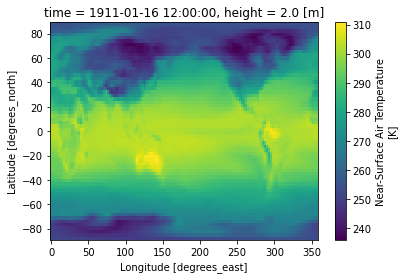

In [123]:
base_experiment_ds.tas.isel(time=0).plot()

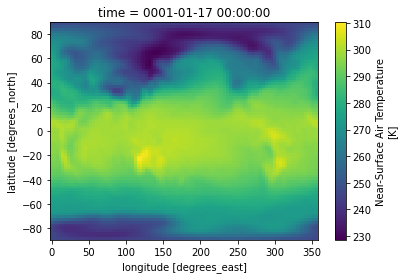

In [121]:
base_picontrol_ds.tas.isel(time=0).plot()

In [124]:
import xesmf 

In [133]:
def regrid_dataset(to_regrid_ds, target_ds):
    regridder = xesmf.Regridder(to_regrid_ds, target_ds, method='bilinear')
    
    regridded_ds = regridder(to_regrid_ds)
    
    return regridded_ds

In [146]:
reload(constants)

<module 'constants' from '/home/563/ab2313/Documents/PhD/zec_mip/../constants.py'>

In [150]:
for fpath in needed_experiments:
    
    # Don't need to regrid the model that is our grid basis.
    if fpath is not base_fpath:
        model = fpath.split('/')[8]
        print(model)

        # Experiment 
        experiment_ds = xr.open_mfdataset(os.path.join(fpath, '*.nc'))
        experiment_ds = open_ds.refactor_dims(experiment_ds)

        # pi-control
        picontrol_ds = open_ds.zecmip_open_matching_picontrol(
            fpath, zecmip_model_paths['picontrol'])[['tas']]
        
        regridded_experiment_ds = regrid_dataset(experiment_ds, base_experiment_ds)
        regridded_experiment_ds = regrid_dataset(picontrol_ds, base_picontrol_ds)

        
        regridded_experiment_ds.to_netcdf(os.path.join(constants.ZECMIP_G_DIR, '4xCO2', f'{model}_4xC02.nc'))
        picontrol_ds.to_netcdf(os.path.join(constants.ZECMIP_G_DIR, 'picontrol', f'{model}_picontrol.nc'))

CanESM5
Opening all datasets in location /g/data/oi10/replicas/CMIP6/CMIP/UA/MCM-UA-1-0/piControl/r1i1p1f1/Amon/tas/gn/v20190731
MIROC-ES2L
Opening all datasets in location /g/data/oi10/replicas/CMIP6/CMIP/MIROC/MIROC-ES2L/esm-piControl/r1i1p1f2/Amon/tas/gn/v20200428
UKESM1-0-LL
Opening all datasets in location /g/data/oi10/replicas/CMIP6/CMIP/MOHC/UKESM1-0-LL/esm-piControl/r1i1p1f2/Amon/tas/gn/v20190916
MPI-ESM1-2-LR
Opening all datasets in location /g/data/oi10/replicas/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/esm-piControl/r1i1p1f1/Amon/tas/gn/v20190815
GISS-E2-1-G-CC
Opening all datasets in location /g/data/oi10/replicas/CMIP6/CMIP/UA/MCM-UA-1-0/piControl/r1i1p1f1/Amon/tas/gn/v20190731
CESM2
Opening all datasets in location /g/data/oi10/replicas/CMIP6/CMIP/NCAR/CESM2/esm-piControl/r1i1p1f1/Amon/tas/gn/v20190723
NorESM2-LM
Opening all datasets in location /g/data/oi10/replicas/CMIP6/CMIP/NCC/NorESM2-LM/esm-piControl/r1i1p1f1/Amon/tas/gn/v20190920
GFDL-ESM4
Opening all datasets in location /g/